On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOVof $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In order to investigate what could be going wrong with this calculation, we should analyze the data in front of us first in a better way. I decided to use Python and import pandas along with matplotlib.pyplot to gain a better understanding of the data and plot it as well.

First I imported pandas to read our excel file, then I took advantage of the describe method within the library to acquire summary of the dataset as shown below

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_excel('Shopify.xlsx')
data.describe()



,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Here we can clearly observe that the maximum order_amount of 704 000 is significantly higher than the top 75% of all orders, and no where near the mean amount listed. Therefore we clearly have some outliers that are skewing the results, thus the higher than expected AOV result found by the Shopify staff :).

Now lets explore this data a bit further and filter out any orders amounts below 4000, this will give us an idea if the list of outliers are frequently reoccuring or not. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('Shopify.xlsx')
data.describe()

data.loc[data['order_amount'] > 4000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 07:23:14
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45


After we filtered the data we can see we have more than one store causing the skewed results, shop_id's 42 and 78 received 67 order amounts well above our mean. 

To find out if these are true outliers, we have to apply the Interquartile Rule for Outliers which can be used to help us detect outliers. Using the data we obtained earlier through the data.describe method, all that we need to do is to is the following:



1) Obtain the interquartile range for our data by subtracting Q3 - Q1

Range : 390 - 163 = 227

2) Multiply our interquartile range (IQR) by 1.5

270*1.5 = 340.5

3) Add 1.5 x (IQR) to Q3. 

340.5 + 390 = 730.5 
Any number greater than 730.5 is a suspected outlier.

4) Subtract 1.5 x (IQR) from the first quartile. 

163 - 340.5 = -177.5
Any number less than -177.5 is a suspected outlier.

Now we must remember that this rule does hold in more cases, and it is important to evaluate it in context of the data at hand. Not all outliers are simply put 'bad data' or 'errors' some due warrant serious thought.

Here I used the boxplot method fro mmatplotlib.pyplot to graphically represent the filtered vs un filtered data if we were to use the IQR rule

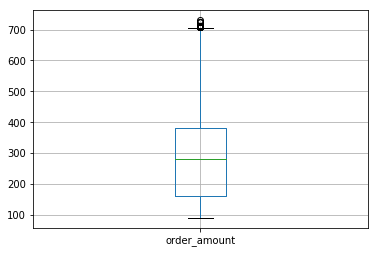

In [34]:
import pandas as pd
import matplotlib.pyplot as plf

data = pd.read_excel('Shopify.xlsx')


Q1 = data['order_amount'].quantile(0.25)
Q3 = data['order_amount'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = data.query('(@Q1 - 1.5 * @IQR) <= order_amount <= (@Q3 + 1.5 * @IQR)').boxplot('order_amount')


Here we can see from the filtered data, that no value conflicts with our lower quartile limits, however much more do conflict with our higher quartile limit, IQR states that we should always evaluate this method in context to the dataset we have, therefore I do not think it would be wise to simply filtered out a large number of orders as it would also skew the results.

In [11]:
import pandas as pd
import matplotlib.pyplot as plf

data = pd.read_excel('Shopify.xlsx')

data['order_amount'].median()

284.0

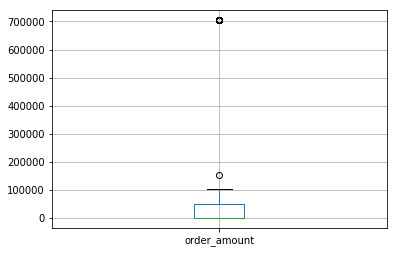

In [9]:
import pandas as pd
import matplotlib.pyplot as plf

data = pd.read_excel('Shopify.xlsx')


Q1 = data['order_amount'].quantile(0.25)
Q3 = data['order_amount'].quantile(0.75)
IQR = Q3 - Q1

unfiltered = data.query('(@Q1 - 1.5 * @IQR) <= order_amount > (@Q3 + 1.5 * @IQR)').boxplot('order_amount')

b)What metric would you report for this dataset?

After carefully investigating the data, and analyzing it, I can say with confidence that the best metric to report for this data would be the Median of the order amounts, as it would better represent the market at hand.

c)What is its Value?

In [11]:
import pandas as pd
import matplotlib.pyplot as plf

data = pd.read_excel('Shopify.xlsx')

data['order_amount'].median()

284.0

In conclusion, although filtering odd outliers, or maybe even recalulating the AOV by taking in consideration the number of purchases in an order rather than just an order, seem like the a plausible solutions, in this case they are not. As every data set is different and requires a strong evaluation before implementing a method and sticking with it.

If we were to filter all the outliers by using the IQR rule, we would have elimiated 141 orders from our set, which would account to almost 3% of our data. Given that these order are reoccurring, this does not signify 'bad data' and should not be removed.

Now if we were to simply change the average number or orders to purchases instead, then that would defeat the purpose of AOV, as now we would be finding the Average Purchase Value, which would be a different calculation all together for different purposes.

Therefore, the median would be the best metric here, furthermore by only looking for the mean(average) we are not doing a robust statistical analysis. Hopefully this addresses your challenge, thanks for the exercise it was fun and helped develop my critical thinking.